In [2]:
import pandas as pd
import numpy as np


In [3]:
#read the excel
df = pd.read_csv('../data/raw/first_clean.csv')

In [4]:
df.head()

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [7]:
#check min max in sqft_basement
display(df['sqft_basement'].min())
display(df['sqft_basement'].max())

0

4820

In [8]:
df['sqft_basement'].describe()

count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

## dealing with basement
majority of the data set has no basement. so we will categorize basement depending on space
with 3 bins

In [13]:
#create a new column to categorize the sqft_basement , if sqft_basement is 0, assign 1, if it´s between 1-500 assign 2,between 500-1000 assign3, above 1000 assign 4 
df['sqft_basement_cat'] = df['sqft_basement'].apply(lambda x: 1 if x == 0 else (2 if x < 500 else (3 if x < 1000 else 4)))

NOW WE CONCENTRATE ON SPLITTING NUMERICAL AND CATEGORICAL DATA



In [14]:
#pick 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floors',sqft_lot15,'sqft_living15', price as numerical variables

numericals = df[['id', 'sqft_above','sqft_lot15','sqft_living15']]
numericals.head()

,id,sqft_above,sqft_lot15,sqft_living15
0,7129300520,1180,5650,1340
1,6414100192,2170,7639,1690
2,5631500400,770,8062,2720
3,2487200875,1050,5000,1360
4,1954400510,1680,7503,1800


In [15]:
#pick 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated' as categorical variables

categoricals = df[['id','waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','bedrooms', 'bathrooms', 'sqft_basement_cat','floors']]

In [16]:
target = df[['id','price']] 

## Working on numericals

For numerical data, we will: <br>
i. check and correct skewness and outliers <br>
ii. check multicollinearity <br>

Rule of thumb :
If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.


In [17]:
#check the distribution of the numerical variables
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
numericals.columns

Index(['id', 'sqft_above', 'sqft_lot15', 'sqft_living15'], dtype='object')

In [19]:
numericalscopy = numericals.copy()

In [20]:
#drop id column
numericals.drop(columns='id',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13280\1530322302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals.drop(columns='id',inplace=True)


In [21]:
numericals.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,21597.0,1788.596842,827.759761,370.0,1190.0,1560.0,2210.0,9410.0
sqft_lot15,21597.0,12758.283512,27274.441950,651.0,5100.0,7620.0,10083.0,871200.0
sqft_living15,21597.0,1986.620318,685.230472,399.0,1490.0,1840.0,2360.0,6210.0


In [22]:
#check min max
numericals.describe().T[['min','max']]

,min,max
sqft_above,370.0,9410.0
sqft_lot15,651.0,871200.0
sqft_living15,399.0,6210.0


we havbe a wide range and that can mess up our linear model, so as a result, we need to transform to a similar range

In [23]:
def plot(df, column_name):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(df[column_name], ax=ax[0])
    sns.histplot(df, x=column_name, bins=50, ax=ax[1])
    plt.show()


for skewness

In [24]:
#define function to check skewness
def check_skewness(df, column_name):
    return df[column_name].skew()

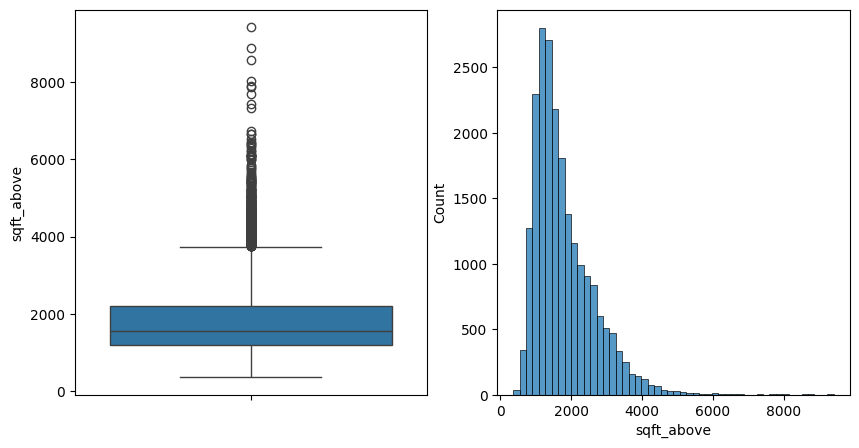

1.4474342353857224

In [25]:
#sqft_above
plot(numericals, 'sqft_above')
check_skewness(numericals, 'sqft_above')

the skewness score is 1.4474 , the distribution is also heavily skewed. We also address the outliers

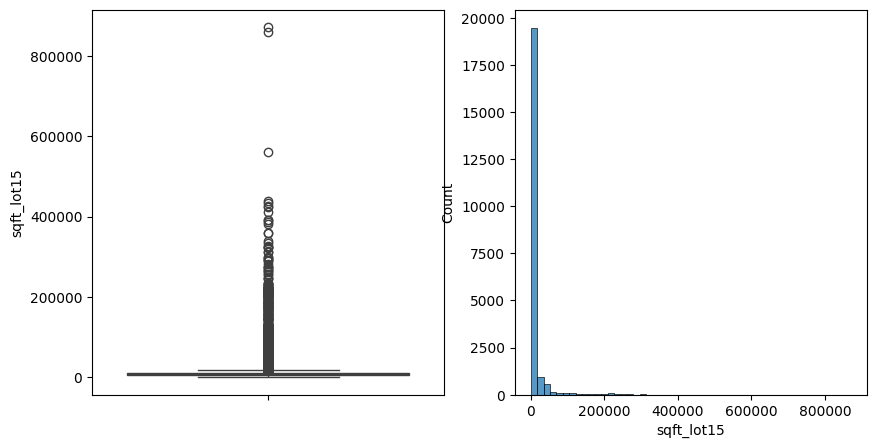

9.524361965117942

In [28]:
#sqft_lot15
plot(numericals, 'sqft_lot15')
check_skewness(numericals, 'sqft_lot15')


extremely skewed, lots of outliers. we will work on both

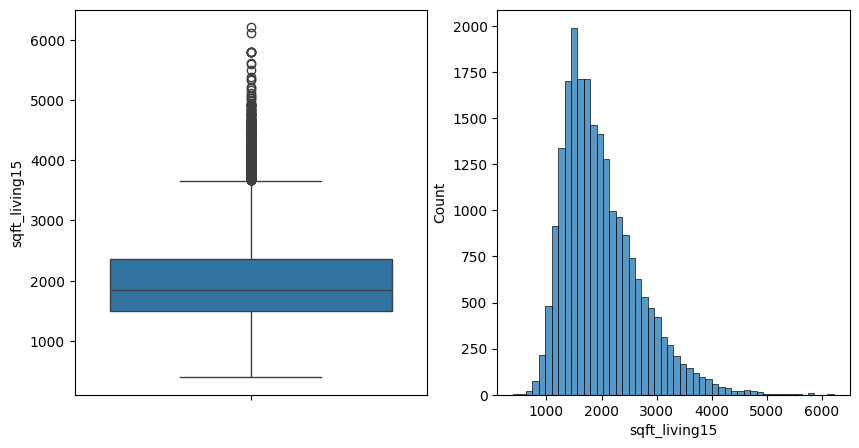

1.1068753971161713

In [29]:
#sqft_living15
plot(numericals, 'sqft_living15')
check_skewness(numericals, 'sqft_living15')

## correcting skewness and outliers

we are going to take two approaches, 
1. drop outliers first before correcting skewness
2. only correct skewness

In [30]:
numericals2 = numericals.copy()

In [31]:
numericals3 = numericals.copy()

In [39]:
def remove_outliers(data, column_name):
    '''
    This function takes a dataframe and a list of columns and returns a dataframe without outliers

    Parameters:
    data: dataframe
    list: list of columns

    returns:
    new dataframe without outliers
    '''
    for column in column_name:
        iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
        upper_whisker = np.percentile(data[column],75) + 1.5*iqr
        lower_whisker = np.percentile(data[column],25) - 1.5*iqr
        data = data[(data[column]<upper_whisker) & (data[column]>lower_whisker)]
    return data

In [36]:
numericals2.head()

,sqft_above,sqft_lot15,sqft_living15
0,1180,5650,1340
1,2170,7639,1690
2,770,8062,2720
3,1050,5000,1360
4,1680,7503,1800


In [41]:
numericals_out=remove_outliers(numericals2, ['sqft_above','sqft_lot15','sqft_living15'])

remove outlier and then check skewness

In [42]:
numericals_out.shape

(18610, 3)

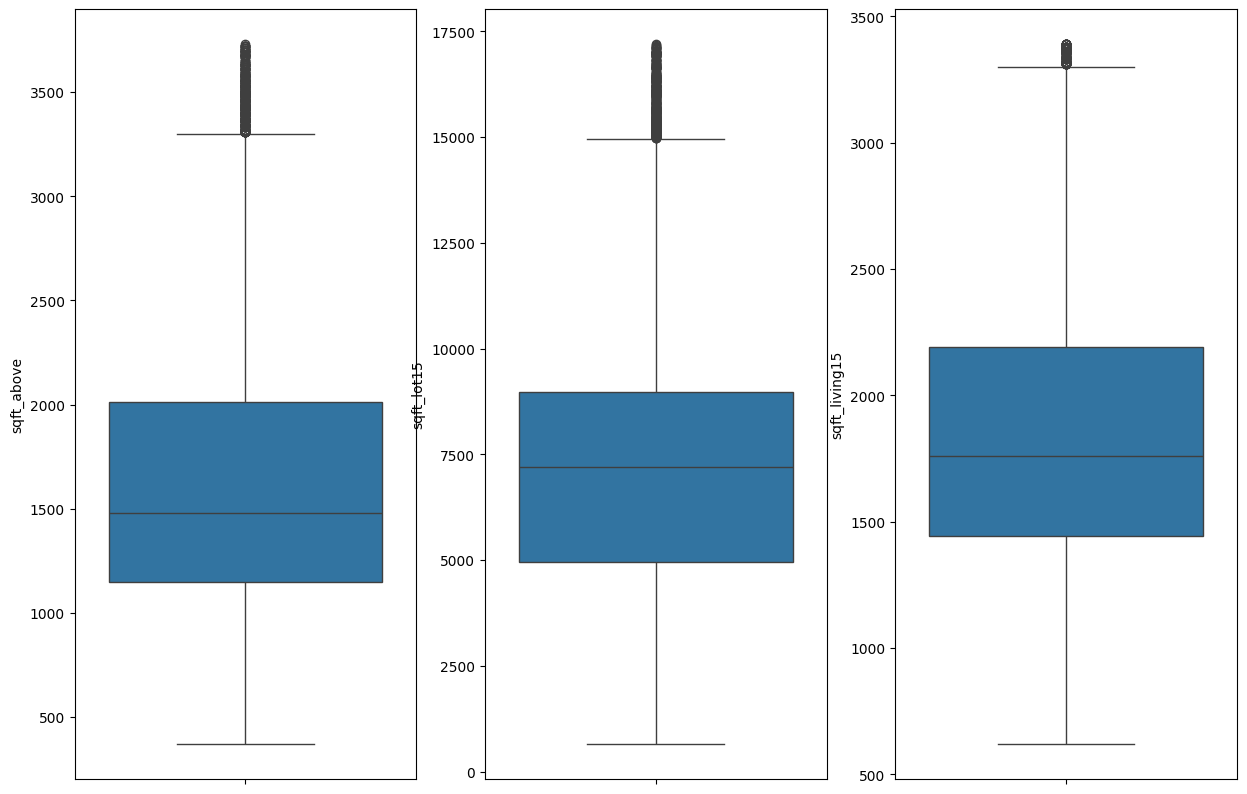

In [45]:
#get boxplot for all the numerical variables, in a grid of 2 rows and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for variable, subplot in zip(numericals_out, ax.flatten()):
    sns.boxplot(numericals_out[variable], ax=subplot)


In [48]:
numericals4 = numericals.copy()

In [46]:
def remove_outliers_iqr(data, columns, threshold=1.5):
    """
    Remove outliers from specified columns using the IQR method.

    Parameters:
    - data: DataFrame
        The input DataFrame containing the data.
    - columns: list
        A list of column names where outliers should be removed.
    - threshold: float, optional
        The threshold value for detecting outliers. The default is 1.5, which is a common choice.

    Returns:
    - DataFrame
        A new DataFrame with outliers removed from the specified columns.
    """

    # Create a copy of the input data
    data_cleaned = data.copy()

    for column in columns:
        # Calculate the IQR for the current column
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers outside the defined bounds
        data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

    return data_cleaned


In [49]:
#assign value to data_cleaned
numerical_out2 = remove_outliers_iqr(numericals4, ['sqft_above','sqft_lot15','sqft_living15'])

In [50]:
#shape
numerical_out2.shape

(18858, 3)

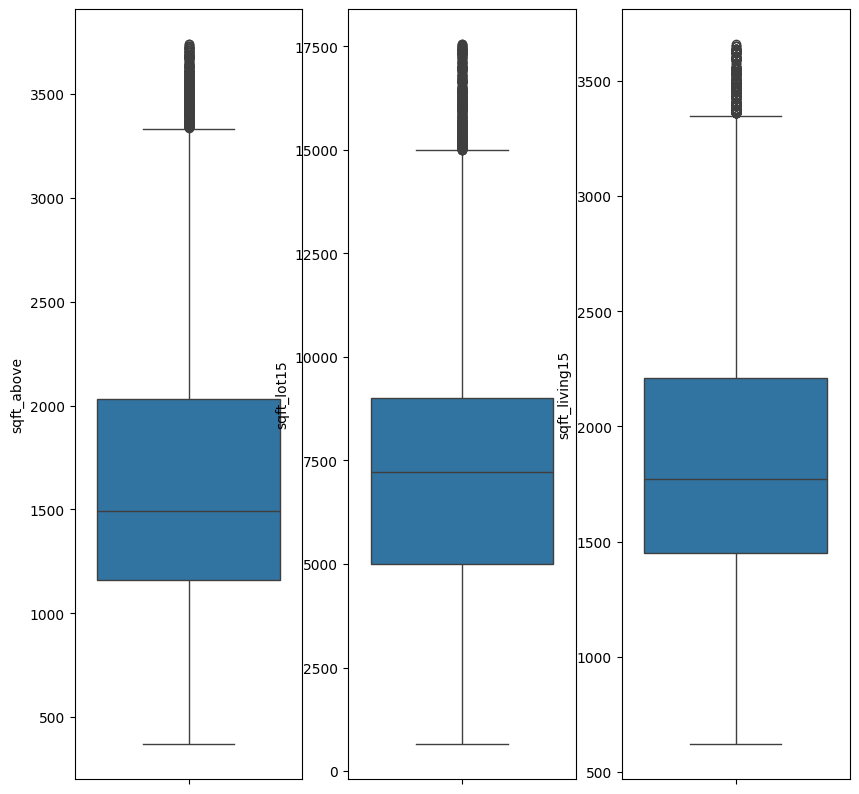

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
for variable, subplot in zip(numerical_out2, ax.flatten()):
    sns.boxplot(numerical_out2[variable], ax=subplot)

In [57]:
#check skewness for all the numerical variables
for column in numerical_out2.columns:
    print(column, check_skewness(numerical_out2, column))



sqft_above 0.8892609070647136
sqft_lot15 0.4406006363237337
sqft_living15 0.7228417883040662


In [58]:
#concat numericalscopy and numerical_out2 to get the id column back
numericalscopy.shape
display(numericalscopy)

,id,sqft_above,sqft_lot15,sqft_living15
0,7129300520,1180,5650,1340
1,6414100192,2170,7639,1690
2,5631500400,770,8062,2720
3,2487200875,1050,5000,1360
4,1954400510,1680,7503,1800
...,...,...,...,...
21592,263000018,1530,1509,1530
21593,6600060120,2310,7200,1830
21594,1523300141,1020,2007,1020
21595,291310100,1600,1287,1410


In [59]:
numerical_out2.shape
display(numerical_out2)

,sqft_above,sqft_lot15,sqft_living15
0,1180,5650,1340
1,2170,7639,1690
2,770,8062,2720
3,1050,5000,1360
4,1680,7503,1800
...,...,...,...
21592,1530,1509,1530
21593,2310,7200,1830
21594,1020,2007,1020
21595,1600,1287,1410


Second outlier removal method retained more rows than the second 
And both boxplots retain similar shape  

In [60]:
#save the cleaned data
numerical_out2.to_csv('../data/raw/numerical_no_outlier.csv', index=False)

In [61]:
#save categorical data
categoricals.to_csv('../data/raw/categorical.csv', index=False)

In [62]:
#save target data
target.to_csv('../data/cleaned/target.csv', index=False)

In [63]:
#save numerical data
numericals.to_csv('../data/raw/numerical.csv', index=False)